# Exploring the Canadian Housing Marking
# By Daniyal Lilani -100867494

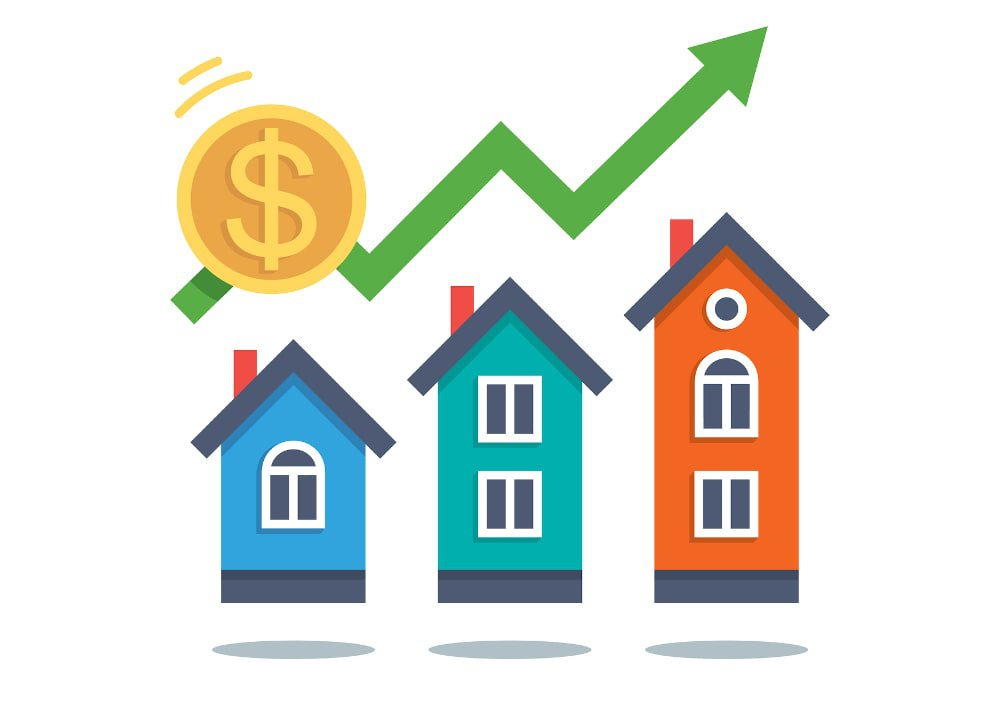

## Introduction

For this project on Exploratory Data Science, I wanted to look into a contemporary issue. After some searching, I decided to analyze the Canadian Housing market. I chose this topic because it is one of great importance to both investors and renters. The Canadian Housing market big impact on Government Policy, specifically in immigration and foriegn investment policies. 

I decided to analyse a data set from Kaggle of ~35000 homes that was last updated October 2023 using the question "Where does the Canadian Housing Market actually look like?" I choose this question because it gave me a high degree of flexibility to investigate the data I was given, under an exploratory framework. Specifically, I was interested in visualizing the data through the use of average price of homes given different constraints.

This was made possible as my data set had a multiple columns with a lot of usuability for exploratory data science. For example, the presence of Average Family Income per province, # of bed/bath(s) per home, and the price of the homes gave me a lot to work with. 

The link to the source data set will be in the References section of the notebook (scroll to the bottom).

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
df = pd.read_csv('housing.csv',encoding='latin-1') # taken from https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte


### Dropping Outliers & Cleaning the data 

In [3]:
df.drop(columns=['Latitude','Longitude', 'Address'])
dfNoOutliers = df[(df['Number_Beds'] <= 8 ) & (df['Number_Beds'] > 0)&(df['Price'] <= 5000000)]


### Pie Chart Comaring the Distribution of Median Income per Family per Province

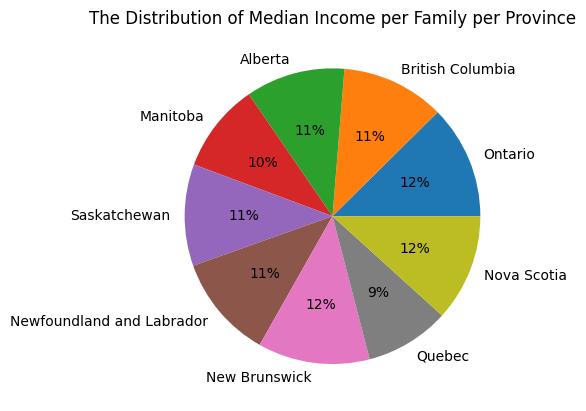

In [4]:
average_income = dfNoOutliers.groupby('Province')['Median_Family_Income'].mean()
province_names= dfNoOutliers['Province'].unique()
province_names_list = list(province_names)

plt.pie(average_income, labels=province_names_list, autopct= '%.0f%%')
plt.title('The Distribution of Median Income per Family per Province')
plt.show()



### Pie Chart showing which province is the most expensive on average

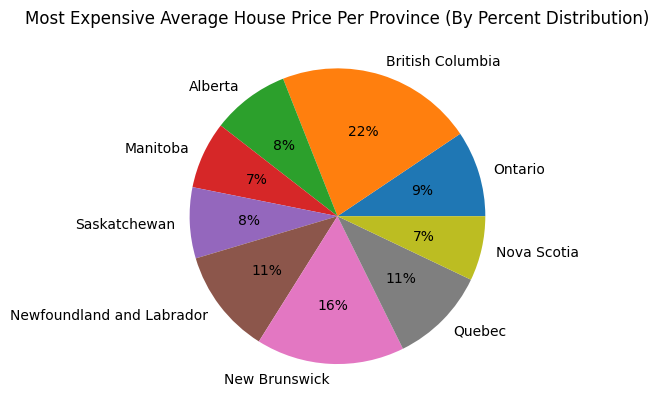

In [5]:
average_house = dfNoOutliers.groupby('Province')['Price'].mean()
province_names= dfNoOutliers['Province'].unique()
province_names_list = list(province_names)

plt.pie(average_house, labels=province_names_list, autopct= '%.0f%%')
plt.title("Most Expensive Average House Price Per Province (By Percent Distribution)")
plt.show()


### Box Plot comparing the number of beds in a home to its price in British Columbia

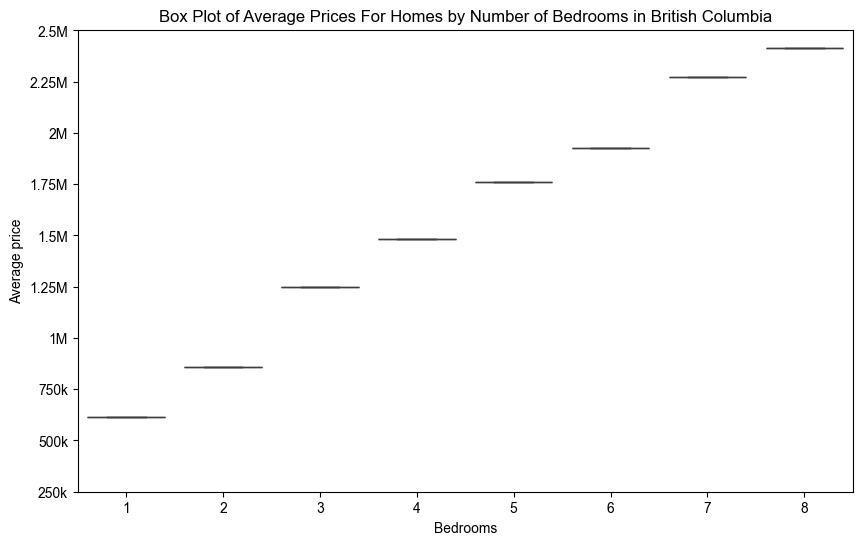

In [6]:
bc_data = dfNoOutliers[(dfNoOutliers['Province']=='British Columbia')]
bc_avg = bc_data.groupby('Number_Beds')['Price'].mean()
plt.figure(figsize=(10,6))


bar = sns.boxplot(x='Number_Beds', y='Price', data=bc_avg.reset_index()) 


sns.set(style='whitegrid')
plt.title('Home Prices by Bedrooms')
plt.xlabel("Bedrooms")
plt.ylabel("Average price")
y_ticks= [250000, 500000, 750000, 1000000, 1250000, 1500000,1750000, 2000000,2250000,2500000]
y_tick_labels = ['250k', '500k', '750k', '1M', '1.25M', '1.5M', '1.75M', '2M', '2.25M', '2.5M']
plt.yticks(y_ticks,y_tick_labels)
plt.title('Box Plot of Average Prices For Homes by Number of Bedrooms in British Columbia')


plt.show()


## Comparing the average price per home per bedroom in the most populated provinces
Namely, Ontario, Quebec, and British Columbia

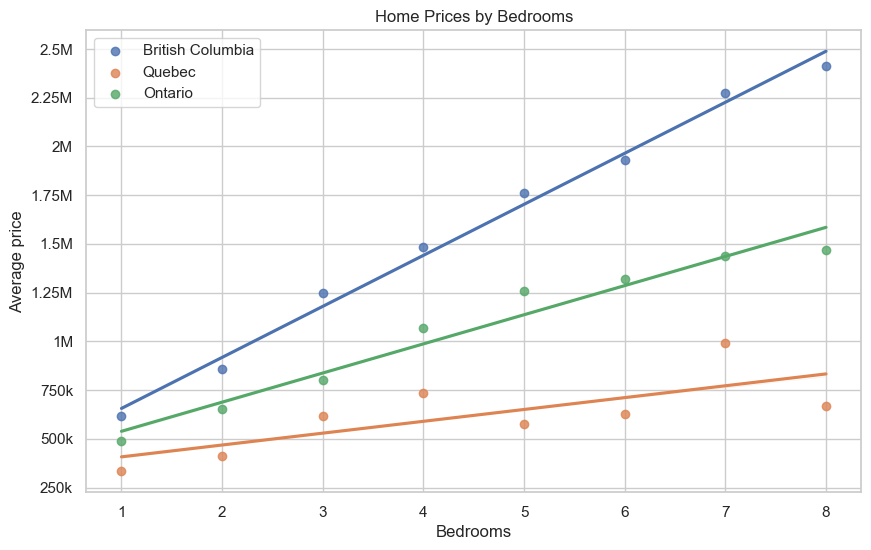

In [7]:

on_data =dfNoOutliers[dfNoOutliers['Province']=='Ontario']
qc_data =dfNoOutliers[dfNoOutliers['Province']=='Quebec']
#bc_data and bc_avg was declared above
on_avg = on_data.groupby('Number_Beds')['Price'].mean()
qc_avg = qc_data.groupby('Number_Beds')['Price'].mean()

plt.figure(figsize=(10,6))
sns.set(style='whitegrid')


sns.regplot(x=bc_avg.index, y=bc_avg.values, label='British Columbia', ci= 0.95)
sns.regplot(x=qc_avg.index, y=qc_avg.values, label='Quebec',ci=0.95)
sns.regplot(x=on_avg.index, y=on_avg.values, label='Ontario',ci=0.95)


plt.title('Home Prices by Bedrooms by Province')
plt.xlabel("Bedrooms")
plt.ylabel("Average price")
y_ticks= [250000, 500000, 750000, 1000000, 1250000, 1500000,1750000, 2000000,2250000,2500000]
y_tick_labels = ['250k', '500k', '750k', '1M', '1.25M', '1.5M', '1.75M', '2M', '2.25M', '2.5M']
plt.yticks(y_ticks,y_tick_labels)
x_ticks=[1,2,3,4,5,6,7,8]
x_tick_labels=['1','2','3','4','5','6','7','8']
plt.xticks(x_ticks,x_tick_labels)

plt.legend()
plt.show()



# Discussion

In the beginning, I created a dfNoOutliers to get rid of a minority of extremely large homes worth many millions of dollars. I wanted to explore the housing majority as it pertains to applications that affect the community and the government

### Pie Chart Comaring the Distribution of Median Income per Family per Province:

In this section, I aimed to compare the median income of families per province. I discovered that average family income across Canada is roughly the same with notably, Quebec having the lowest. Overall the difference from highest earning to lowest earning median family income by province was only 3%.

### Pie Chart showing which province is the most expensive on average

In this section, I wanted to find which provinces are more expensive on average. I decided to use a pie chart as it would show me a good representation of any disporpotionality in average price compared to other provinces. Shockingly, I found that British Columbia is the most expensive province by a long shot. Futhermore, from the previous pie chart, I found that British Columbia's median income is porportionally in line with the rest of Canada. This would indicate that residence in BC would be feeling the housing crisis the most out of all Canadians.

### Box Plot comparing the number of beds in a home to its price in British Columbia 

Based on my findings from the previous two charts, I decided to set up a box plot comapring the prices of homes by # of bedrooms in BC. I found that the increase in price between homes by bedrooms in BC followed a mostly linear trajectory. There was a noticable jump in price between 7 and 8 bedroom homes, and 2 and 3 bedroom homes. Interestingly, 3 bedrooms is where the prices past $1 Million and 8 bedrooms is where prices past the $2 Million mark.

### Comparing the average price per home per bedroom in the most populated provinces

I lastly chose to compare the average price per home per bedroom in the 3 most populated provinces, in order to gain a greater perspective on the largest population centers in Canada. To do this, I created a regression line plot with a 95% CI. I found that each province followed a mostly linear increase in price each time a bedroom was added. I found that British Columbia was the most expensive, Ontario the second, and Quebec the least expensive on average out of the 3  provinces. 

# References

Data set from: https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities "Data is currently representative of prices as of October 29th 2023. Future updates will occur monthly."


UTC 8 error solution: https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

Packages:

pandas,
matplotlib.pyplot, 
seaborn
